### 1 Understanding heteroskedasticity using simulated data 

The exercises below are intended to help you understand how heteroskedasticity influences estimates. To evaluate this, we will generate simulated data. This is often a useful exercise, if you want to understand how different data-generating processes influence the precision of different estimation methods.

1. In the first part of the exercise, we will generate a homoskedastic model with the following characteristics: $y_0 = β_0 + β_1x + u_0$ where $y_0$ is the dependent variable, $x$ is a uniformly distributed variable ranging from 8 to 15, $β_0 = 0$, $β_1 = 5$, and $u_0 ∼ N (0, σ^2)$, $σ^2 = 2$.

(a) Generate 1000 random draws from a uniform distribution ranging from 8 to 15 and store them in a variable named x. When generating ran- dom variables, it is important to set the seed of the random generation (i.e. tell the program how exactly to generate the same set of random variables each time). Set the seed to 1234.

In [1]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(1234)

# Generate random data for 1000 samples from [8,15]
x = np.random.uniform(low=8, high=15, size=1000)

print(x[:10])

[ 9.34063615 12.3547614  11.06409417 13.49751009 13.45983066  9.90814824
  9.93524979 13.61310524 14.70697548 14.13152844]


(b) Generate the scalars beta 0 and beta 1 equal to 0 and 5, respecitively.

In [2]:
# Set scalar coefficients
beta_0 = 0
beta_1 = 5

(c) Generate the variable homoskedastic error, which is normally dis- tributed, with mean 0 and variance of 2.

In [3]:
homoskedastic_error = np.random.normal(loc=0, scale=2, size=1000)

(d) Generate a variable homoskedastic y which is defined according to the model outlined above.

In [4]:
# Add the variables
y = beta_0 + beta_1 * x + homoskedastic_error
print(y[:10])

[48.07430393 61.45891902 58.0830464  67.62440355 67.92422587 50.44924756
 48.09930518 67.93384555 70.69791769 70.37813554]


(e) Create a scatter plot of homoskedastic y and x. Add a regression line to it, in order to be able to see that the errors are homoskedastic. How can you tell that that is the case?

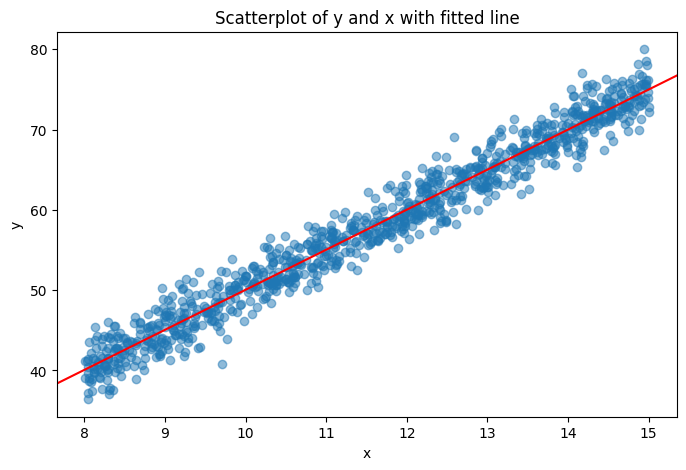

In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

# Estimate the model
X = sm.add_constant(x)         # Design-Matrix with Intercept
model = sm.OLS(y, X).fit()     # OLS

# Plot the data and the fitted line
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, alpha=0.5)
abline_plot(model_results=model, ax=ax, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of y and x with fitted line')
plt.show()

We can see that the Data is homoskedastic because the variance of the error seems to be constant along x.

(f) Generate the variable homoskedastic error pred equal to: $\hat{u}_0 = y_0 − \hat{y}_0$

In [6]:
# Predict y values using the model
y_pred = model.predict(X)

# Calculate the residuals (homoskedastic errors)
homoskedastic_error_pred = y - y_pred

np.set_printoptions(suppress=True, precision=4)

print("Summe der Residuen:", homoskedastic_error_pred.sum())
print(homoskedastic_error_pred.sum()) 


Summe der Residuen: 2.2737367544323206e-12
2.2737367544323206e-12


(g) Create a scatter plot of homoskedastic y and homoskedastic error pred. Add a regression line to it, in order to be able to see that the errors are homoskedastic. How can you tell that that is the case?

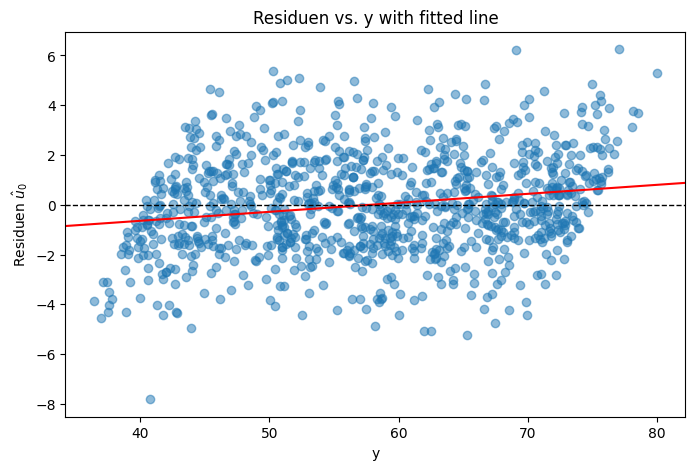

In [10]:
# 1. Regression der Residuen auf y schätzen
X2 = sm.add_constant(y)  
model2 = sm.OLS(homoskedastic_error_pred, X2).fit()

# 2. Scatterplot und fitted line
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(y, homoskedastic_error_pred, alpha=0.5)
abline_plot(model_results=model2, ax=ax, color='red')

ax.axhline(0, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('y')
ax.set_ylabel('Residuen $\hat u_0$')
ax.set_title('Residuen vs. y with fitted line')
plt.show()

The slope of the fitted line is:
$$
\frac{\mathrm{Cov}(\hat u, y)}{\mathrm{Var}(y)}
= \frac{\mathrm{Cov}(\hat u, \hat{y}+\hat{u})}{\mathrm{Var}(y)}
= \frac{\mathrm{Var}(\hat u)}{\mathrm{Var}(y)} > 0,
$$

because

$$
\mathrm{Cov}(\hat u, y) = \mathrm{Var}(\hat u),
\quad
\mathrm{Cov}(\hat u, x) = 0.
$$

If we would plot $\hat{u}$ against $x$ or $\hat{y}$ the fitted line would be horizontal at zero, because of the Zero-Conditional-Mean (Orthoghonality-Condition). But if we plot the Residuals against the total $y$ ($y=\hat{y}+\hat{u}$) we see an upward slope, since $y$ itself contains $\hat{u}$. As $y$ grows the residual grows, because the model predicts worse at very small and big values. This mechanical necessity creates a positive correlation between  $\hat{u}$ and $y$.

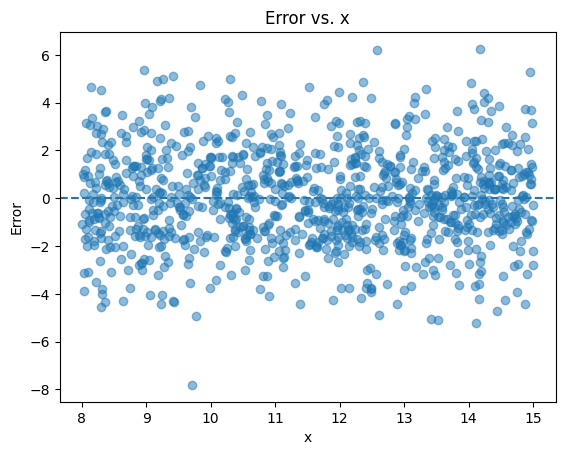

In [12]:
plt.scatter(x, homoskedastic_error_pred, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error vs. x')
plt.show()

## 2 Heteroskedastic Model

In the second part of the exercise, we will generate a heteroskedastic model with the following characteristics:

$$
y_1 = \beta_0 + \beta_1 x + u_1
$$

where $y_1$ is the dependent variable, and

$$
u_1 = u_0 \times \lvert x - \bar{x} \rvert
$$

with $\bar{x}$ being the mean of $x$. The rest of the variables ($\beta_0$, $\beta_1$, $x$, $u_0$) are defined as before. This model will illustrate the consequences of “bad” heteroskedasticity.


(a) Generate a scalar mean x, which is equal to the mean value of the simulated variable x.

In [13]:
# Comupute the mean
mean_x = np.mean(x)
print("Mean of x:", mean_x)

Mean of x: 11.561632708237907
